# **Installing Necessary Libraries and loading the data**

In [2]:
# Necessary libraries
import pandas as pd
import numpy as np
import pyreadstat
import seaborn as sns
import matplotlib.pyplot as plt
import os

path_base = "./data"

# File names
file_2016 = "2016.sav"
file_2019 = "2019.sav"

# Construct full paths
data_path_2016 = os.path.join(path_base, file_2016)
data_path_2019 = os.path.join(path_base, file_2019)

# Load the Data
df_2016, meta_2016 = pyreadstat.read_sav(data_path_2016)
df_2019, meta_2019 = pyreadstat.read_sav(data_path_2019)

In [3]:
lf_VC_PRCP = [
    'Pvt_matter', 'Too_minor', 'Not_clear', 
    'Not_intended', 'No_offd_law'
]

lf_VC_PLC = [
    'Plc_no_stop', 'Plc_no_find', 'Plc_no_lgl_ath', 'Plc_lack_ptc',
    'Plc_no_evdnc', 'Plc_no_blf', 'Plc_my_fault', 'Plc_no_imp',
    'Plc_offd_plc', 'Plc_ineff', 'Plc_neg_exp', 'Plc_no_trust'
]

VC_HELP = [
    'Rpt_oth_offr', 'Rpt_parent'
]

lf_VC_ISL = [
    'No_ctc_order', 'Res_moved', 'Offd_moved'
]

In [4]:
all_features = lf_VC_PRCP + lf_VC_PLC + lf_VC_ISL + VC_HELP

In [5]:
rename_LF_PRCP_columns = {'NO_RptP2': 'Pvt_matter', 'NO_RptP4': 'Too_minor', 'NO_RptP5': 'Not_clear', 'NO_RptP6': 'Not_intended', 
                          'NO_RptP21': 'No_offd_law'}
rename_LF_PLC_columns = {'NO_RptP7': 'Plc_no_stop', 'NO_RptP8': 'Plc_no_find', 'NO_RptP9': 'Plc_no_lgl_ath', 
                         'NO_RptP10': 'Plc_lack_ptc', 'NO_RptP11': 'Plc_no_evdnc', 'NO_RptP12': 'Plc_no_blf', 
                         'NO_RptP13': 'Plc_my_fault', 'NO_RptP14': 'Plc_no_imp', 'NO_RptP15': 'Plc_offd_plc', 
                         'NO_RptP16': 'Plc_ineff', 'NO_RptP17': 'Plc_neg_exp', 'NO_RptP19': 'Plc_no_trust'}
rename_VC_HELP_columns = {'NO_RptP1': 'Rpt_oth_offr', 'NO_RptP3': 'Rpt_parent'}
rename_VC_ISL_columns = {'NO_RptP23': 'No_ctc_order', 'NO_RptP24': 'Res_moved', 'NO_RptP25': 'Offd_moved'}

In [6]:
df_2016 = df_2016.rename(columns={**rename_LF_PRCP_columns, **rename_LF_PLC_columns, 
                                  **rename_VC_HELP_columns, **rename_VC_ISL_columns})
df_2019 = df_2019.rename(columns={**rename_LF_PRCP_columns, **rename_LF_PLC_columns, **rename_VC_HELP_columns, 
                                  **rename_VC_ISL_columns})

In [7]:
# Step 1: Subset the selected columns from both datasets
df_2016_sub = df_2016[all_features].copy()
df_2019_sub = df_2019[all_features].copy()

print(f"2016 null ----> \n{df_2016_sub.isna().sum()}")
print()
print(f"2019 null ----> \n{df_2019_sub.isna().sum()}")
# Optional: Add year column to distinguish after merge
df_2016_sub["YEAR"] = 2016
df_2019_sub["YEAR"] = 2019

# Step 2: Combine the two DataFrames
df_combined = pd.concat([df_2016_sub, df_2019_sub], ignore_index=True)

# Step 3: Merge metadata (combine column labels from both years)
# Note: pyreadstat uses dicts for metadata: {column_name: label}
combined_variable_value_labels = {**meta_2016.variable_value_labels, **meta_2019.variable_value_labels}
combined_column_labels = meta_2016.column_names_to_labels.copy()

# Ensure any missing column labels from 2019 are added
for col, label in meta_2019.column_names_to_labels.items():
    if col not in combined_column_labels:
        combined_column_labels[col] = label

# Add YEAR label
combined_column_labels["YEAR"] = "Survey Year"

# Step 4: Write to SAV file with metadata
output_path = os.path.join("data", "combined_data_2016_2019.sav")
pyreadstat.write_sav(
    df_combined,
    output_path,
    variable_value_labels=combined_variable_value_labels,
    column_labels=combined_column_labels
)

print(f"✅ SAV file written to: {output_path}")

2016 null ----> 
Pvt_matter        0
Too_minor         0
Not_clear         0
Not_intended      0
No_offd_law       0
Plc_no_stop       0
Plc_no_find       0
Plc_no_lgl_ath    0
Plc_lack_ptc      0
Plc_no_evdnc      0
Plc_no_blf        0
Plc_my_fault      0
Plc_no_imp        0
Plc_offd_plc      0
Plc_ineff         0
Plc_neg_exp       0
Plc_no_trust      0
No_ctc_order      0
Res_moved         0
Offd_moved        0
Rpt_oth_offr      0
Rpt_parent        0
dtype: int64

2019 null ----> 
Pvt_matter        0
Too_minor         0
Not_clear         0
Not_intended      0
No_offd_law       0
Plc_no_stop       0
Plc_no_find       0
Plc_no_lgl_ath    0
Plc_lack_ptc      0
Plc_no_evdnc      0
Plc_no_blf        0
Plc_my_fault      0
Plc_no_imp        0
Plc_offd_plc      0
Plc_ineff         0
Plc_neg_exp       0
Plc_no_trust      0
No_ctc_order      0
Res_moved         0
Offd_moved        0
Rpt_oth_offr      0
Rpt_parent        0
dtype: int64
✅ SAV file written to: data\combined_data_2016_2019.sav


In [8]:
# Path to combined SAV file inside the data folder
combined_path = os.path.join("data", "combined_data_2016_2019.sav")

# Load the combined data and metadata
df_combined, meta_combined = pyreadstat.read_sav(combined_path)

In [9]:
for col in df_combined.columns:
    print(df_combined[col].value_counts())

Pvt_matter
0.0    1541
1.0     468
3.0       5
Name: count, dtype: int64
Too_minor
0.0    1515
1.0     494
3.0       5
Name: count, dtype: int64
Not_clear
0.0    1826
1.0     183
3.0       5
Name: count, dtype: int64
Not_intended
0.0    1865
1.0     144
3.0       5
Name: count, dtype: int64
No_offd_law
0.0    1926
1.0      83
3.0       5
Name: count, dtype: int64
Plc_no_stop
0.0    1670
1.0     339
3.0       5
Name: count, dtype: int64
Plc_no_find
0.0    1928
1.0      81
3.0       5
Name: count, dtype: int64
Plc_no_lgl_ath
0.0    1978
1.0      31
3.0       5
Name: count, dtype: int64
Plc_lack_ptc
0.0    1989
1.0      20
3.0       5
Name: count, dtype: int64
Plc_no_evdnc
0.0    1868
1.0     141
3.0       5
Name: count, dtype: int64
Plc_no_blf
0.0    1957
1.0      52
3.0       5
Name: count, dtype: int64
Plc_my_fault
0.0    1984
1.0      25
3.0       5
Name: count, dtype: int64
Plc_no_imp
0.0    1887
1.0     122
3.0       5
Name: count, dtype: int64
Plc_offd_plc
0.0    1994
1.0      15
3

In [10]:
latent_feature_groups = {
    "VC_ISL": (lf_VC_ISL, {3.0: np.nan, 8.0: np.nan, 9.0: np.nan}),
    "VC_HELP": (VC_HELP, {3.0: np.nan, 8.0: np.nan, 9.0: np.nan}),
    "VC_PLC": (lf_VC_PLC, {3.0: np.nan, 8.0: np.nan, 9.0: np.nan}),
    "VC_PRCP": (lf_VC_PRCP, {3.0: np.nan, 8.0: np.nan, 9.0: np.nan}),
}

# This code is for replacing (Special Codes / NaN ) with Mode

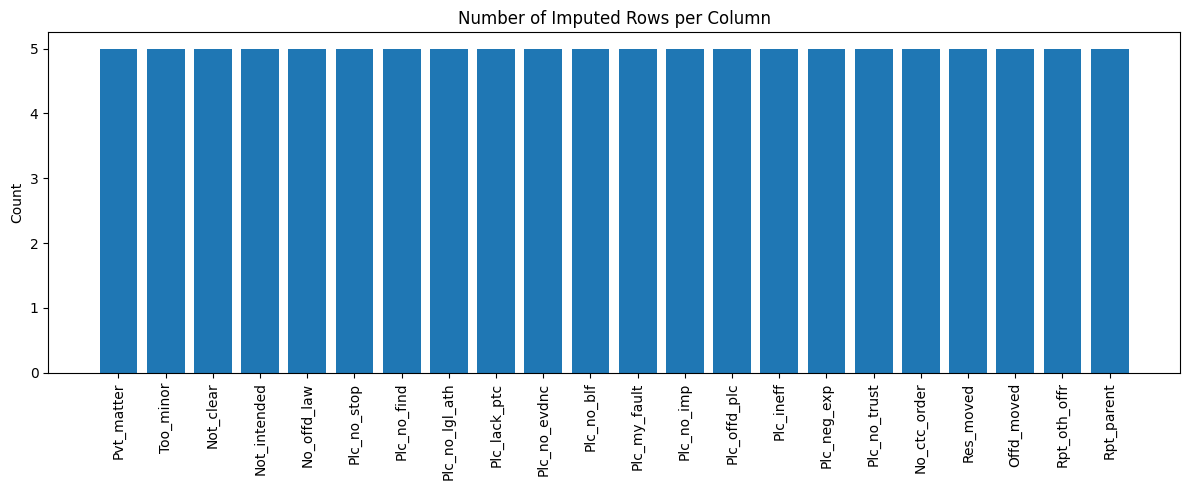

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Copy original data for comparison
df_filled = df_combined[all_features].copy()

for group_name, (columns, replace_dict) in latent_feature_groups.items():
    for col in columns:
        if col in df_filled.columns and replace_dict:
            df_filled[col] = df_filled[col].replace(replace_dict)

# Step 3: Count rows to be imputed
imputed_counts = {}

# Step 4: Impute with mode and track how many were filled
for col in df_filled.columns:
    n_missing = df_filled[col].isna().sum()
    imputed_counts[col] = n_missing
    
    if n_missing > 0:
        mode_val = df_filled[col].mode(dropna=True)
        if not mode_val.empty:
            df_filled[col].fillna(mode_val[0], inplace=True)

# Step 5: Plot number of imputed rows per column
plt.figure(figsize=(12, 5))
plt.bar(imputed_counts.keys(), imputed_counts.values())
plt.xticks(rotation=90)
plt.title("Number of Imputed Rows per Column")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

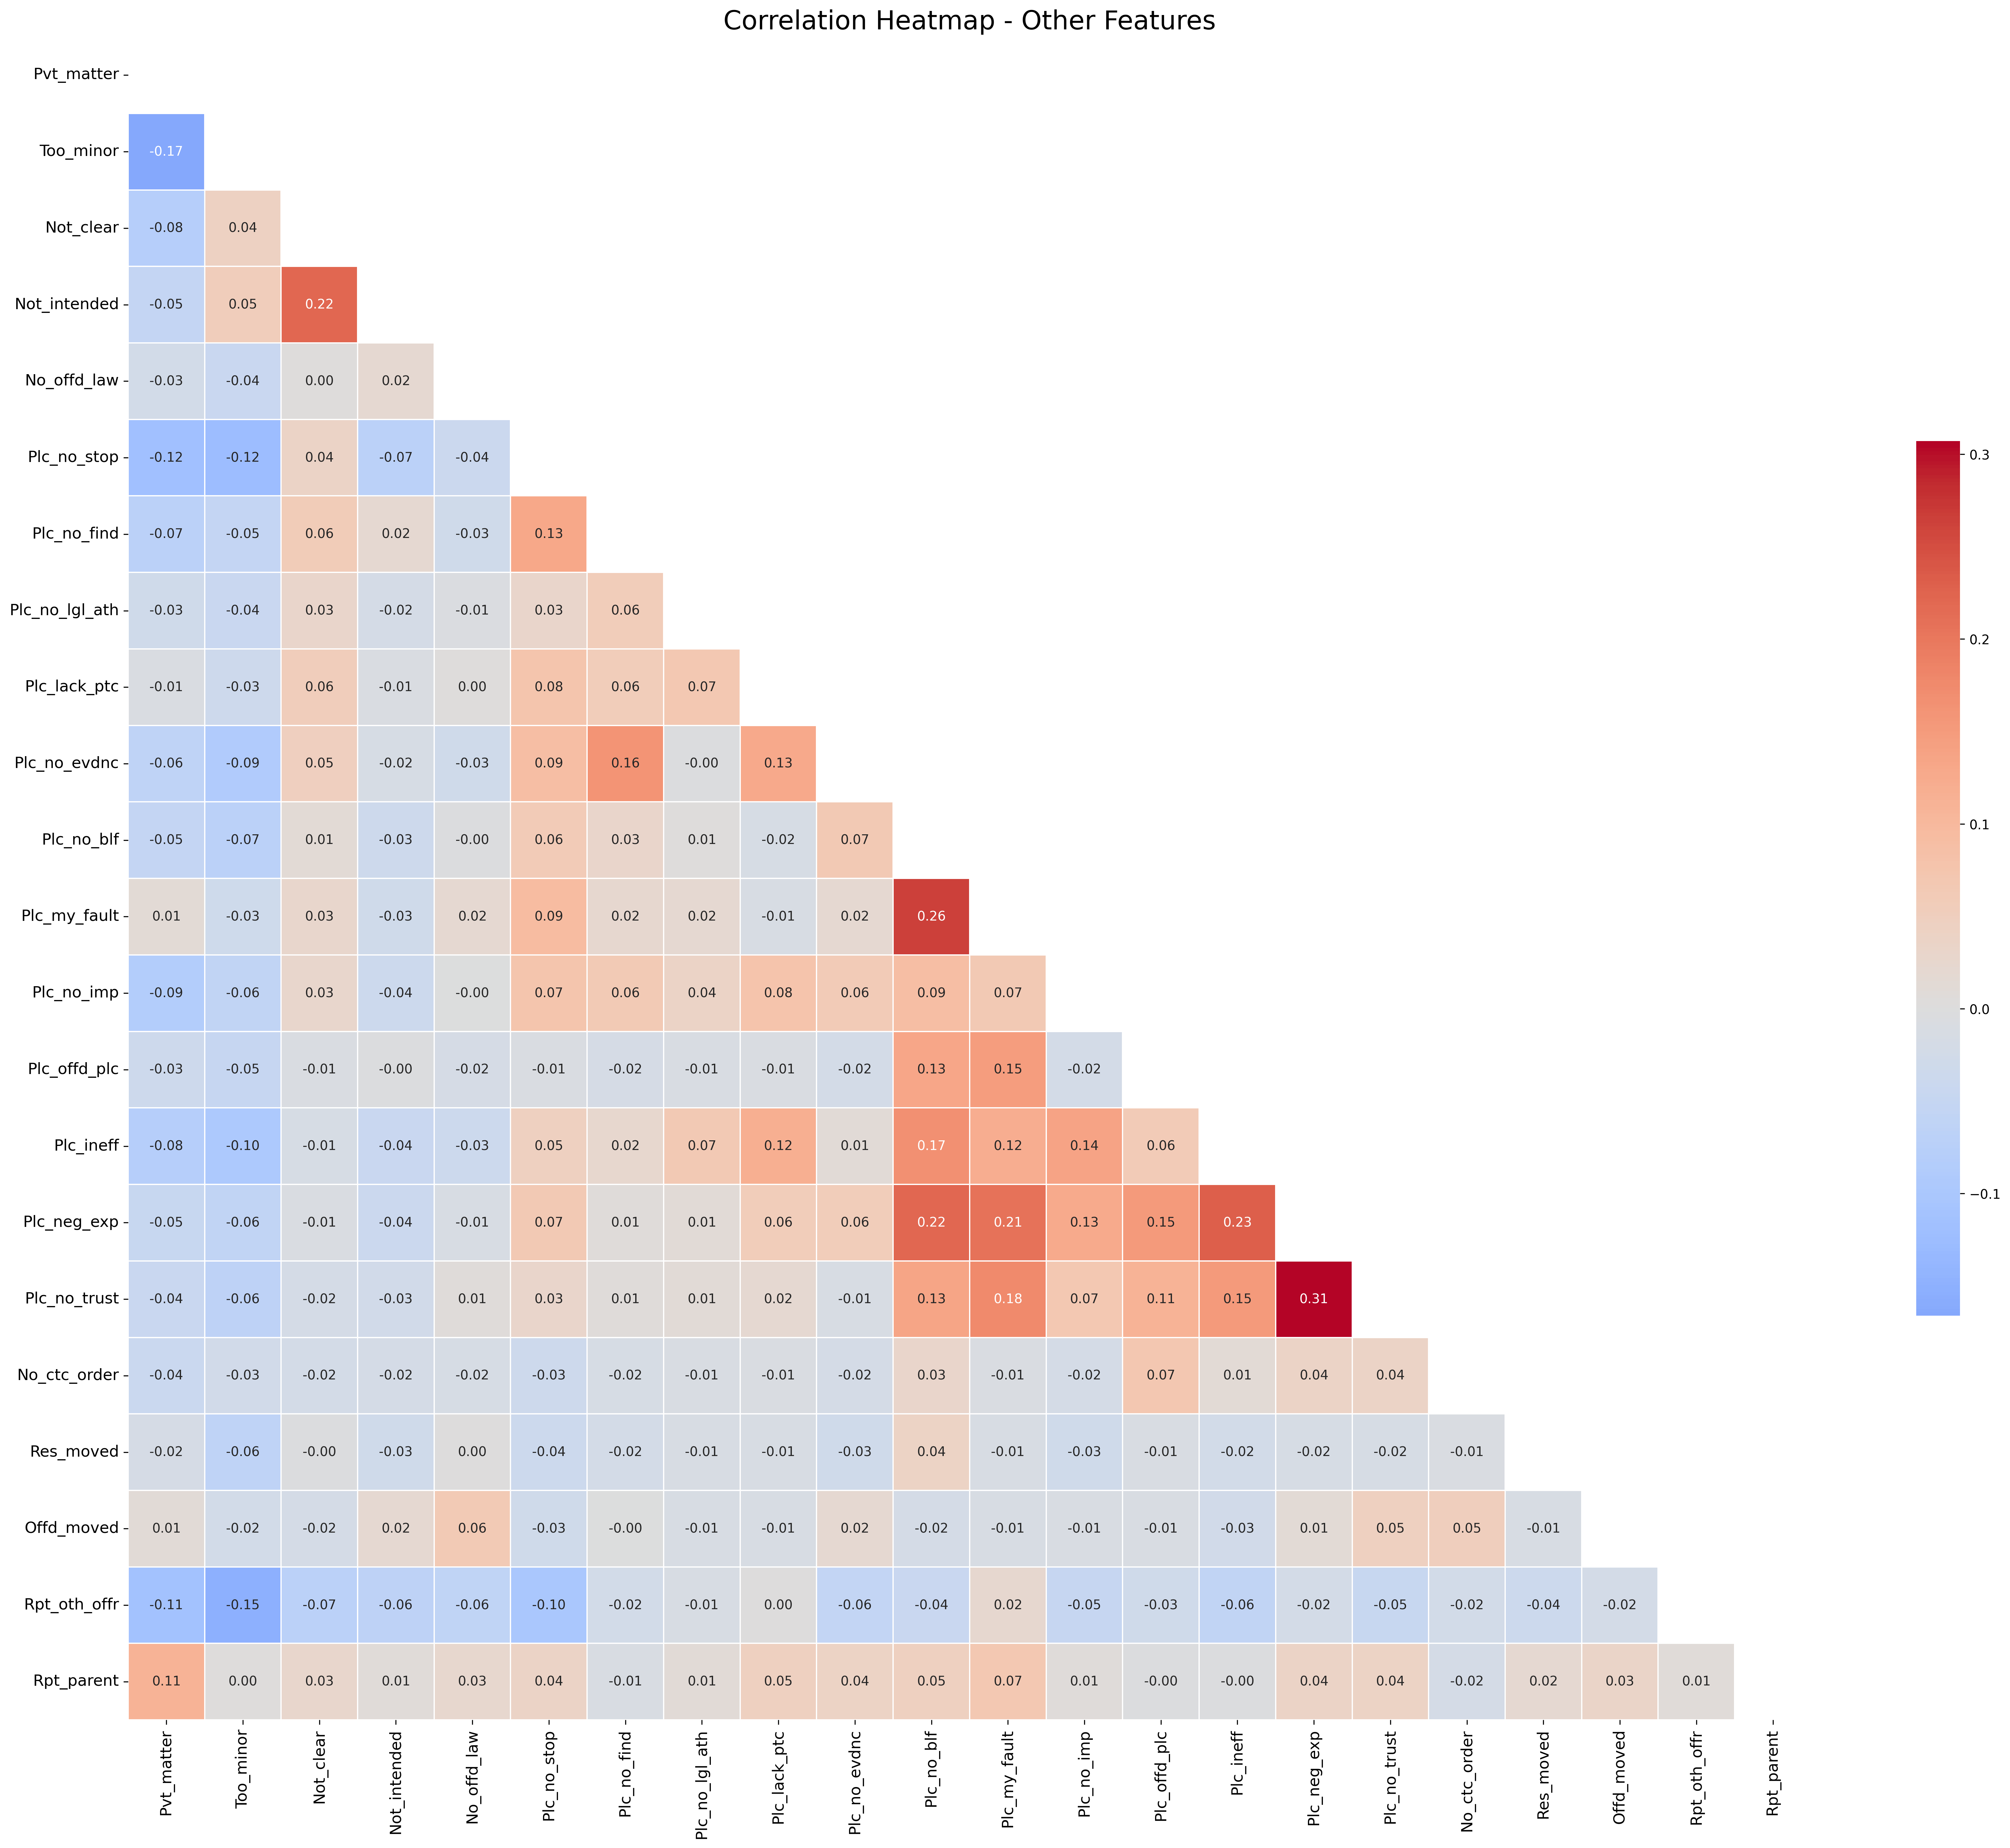

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr_data = df_filled.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_data, dtype=bool))

# Set up the figure
plt.figure(figsize=(24, 20), dpi=300)

# Draw the heatmap with the mask
sns.heatmap(
    corr_data,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.5},
    annot_kws={"size": 10}
)

# Titles and axis labels
plt.title("Correlation Heatmap - Other Features", fontsize=20)
plt.xticks(rotation=90, ha='center', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Layout fix
plt.tight_layout()
plt.show()

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# ----- Step 1: Prepare Data -----
df = df_filled.copy() 


# ----- Step 2: Find best k using Silhouette Score -----
def find_best_k(X, k_range=(2, 15)):
    best_k = None
    best_score = -1
    scores = []
    for k in range(k_range[0], k_range[1] + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)
        scores.append((k, score))
        print(f"k = {k}: Silhouette Score = {score:.4f}")
        if score > best_score:
            best_score = score
            best_k = k
    return best_k, scores

print("\n-- Silhouette Scores --")
best_k, _ = find_best_k(df)

# ----- Step 3: Cluster on scaled data -----
kmeans = KMeans(n_clusters=best_k, random_state=42).fit(df)

# ----- Step 4: Assign Cluster Labels to Original (Unscaled) Data -----
df_labeled = df.copy()  # use original values for interpretation
df_labeled['Cluster'] = kmeans.labels_

# ----- Step 5: Get Cluster Summary using Original Data -----
cluster_summary = df_labeled.groupby('Cluster').mean().T
cluster_summary.columns = [f"Cluster {c}" for c in cluster_summary.columns]

print("\n-- Cluster Summary (Original Values) --")
print(cluster_summary)


-- Silhouette Scores --
k = 2: Silhouette Score = 0.1663
k = 3: Silhouette Score = 0.2451
k = 4: Silhouette Score = 0.3781
k = 5: Silhouette Score = 0.4265
k = 6: Silhouette Score = 0.4457
k = 7: Silhouette Score = 0.4505
k = 8: Silhouette Score = 0.4851
k = 9: Silhouette Score = 0.4987
k = 10: Silhouette Score = 0.5110
k = 11: Silhouette Score = 0.5311
k = 12: Silhouette Score = 0.5504
k = 13: Silhouette Score = 0.5625
k = 14: Silhouette Score = 0.5635
k = 15: Silhouette Score = 0.5789

-- Cluster Summary (Original Values) --
                Cluster 0  Cluster 1  Cluster 2  Cluster 3  Cluster 4  \
Pvt_matter       0.400000   0.067183   1.000000   0.013333   0.020921   
Too_minor        0.266667   1.000000   0.000000   0.040000   0.016736   
Not_clear        0.133333   0.000000   0.000000   0.013333   0.000000   
Not_intended     0.066667   0.000000   0.017291   0.013333   0.004184   
No_offd_law      0.066667   0.000000   0.000000   0.000000   0.000000   
Plc_no_stop      0.133333   

=== Inertia Values by Number of Clusters ===
k = 2: Inertia = 2211.13
k = 3: Inertia = 1916.44
k = 4: Inertia = 1525.56
k = 5: Inertia = 1325.14
k = 6: Inertia = 1244.03
k = 7: Inertia = 1218.44
k = 8: Inertia = 1095.96
k = 9: Inertia = 1042.92
k = 10: Inertia = 1003.57
k = 11: Inertia = 933.18
k = 12: Inertia = 877.58
k = 13: Inertia = 844.42
k = 14: Inertia = 833.87
k = 15: Inertia = 791.61
k = 16: Inertia = 766.37
k = 17: Inertia = 738.10
k = 18: Inertia = 715.69
k = 19: Inertia = 706.56


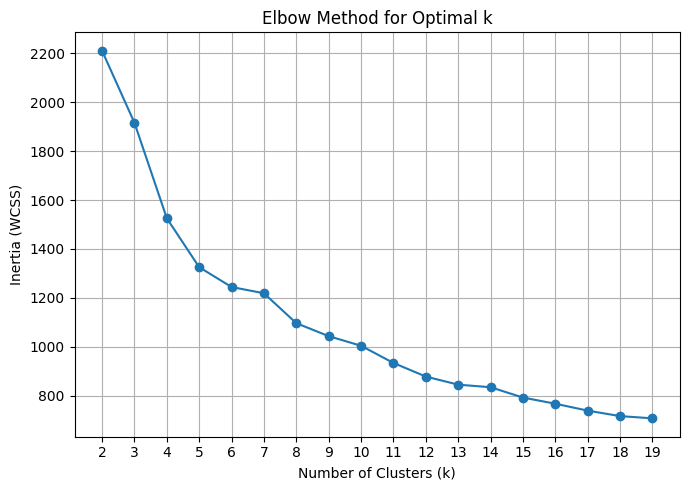

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


inertia_values = []
k_range = range(2, 20)

print("=== Inertia Values by Number of Clusters ===")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_filled)
    inertia = kmeans.inertia_
    inertia_values.append(inertia)
    print(f"k = {k}: Inertia = {inertia:.2f}")

# Plotting the Elbow Curve
plt.figure(figsize=(7, 5))
plt.plot(k_range, inertia_values, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal k")
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
# Fit KMeans with k=5
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_filled)  # Fit the model to the data

# Add the cluster labels to the DataFrame
df_filled['Cluster'] = kmeans.labels_

# Save the data with clusters into a CSV
df_filled.to_csv('data_with_clusters.csv', index=False)

print("Data with clusters saved to 'data_with_clusters.csv'")

Data with clusters saved to 'data_with_clusters.csv'


In [17]:
df_filled.head()

,Pvt_matter,Too_minor,Not_clear,Not_intended,No_offd_law,Plc_no_stop,Plc_no_find,Plc_no_lgl_ath,Plc_lack_ptc,Plc_no_evdnc,...,Plc_offd_plc,Plc_ineff,Plc_neg_exp,Plc_no_trust,No_ctc_order,Res_moved,Offd_moved,Rpt_oth_offr,Rpt_parent,Cluster
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [18]:
import pandas as pd

# Step 1: Group by 'Cluster' and calculate the mean for each feature
cluster_summary = df_filled.groupby('Cluster').mean()

# Step 2: Transpose the summary table so that features are in the index and clusters are columns
cluster_summary = cluster_summary.T  # Transpose so that features are in the index and clusters are columns

# Step 3: Count the number of data points in each cluster
cluster_counts = df_filled['Cluster'].value_counts().sort_index()

# Step 4: Add the 'Data Points' row at the bottom
cluster_summary.loc['Data Points'] = cluster_counts

# Step 5: Save the updated cluster summary to a CSV
cluster_summary.to_csv('cluster_summary_with_counts.csv')

print("Cluster summary with data points saved to 'cluster_summary_with_counts.csv'")

Cluster summary with data points saved to 'cluster_summary_with_counts.csv'


In [19]:
cluster_summary

Cluster,0,1,2,3,4
Pvt_matter,0.074468,0.085202,1.000000,0.000000,0.122024
Too_minor,0.026596,1.000000,0.000000,0.000000,0.127976
Not_clear,0.021277,0.094170,0.024000,0.133034,0.116071
Not_intended,0.015957,0.094170,0.032000,0.113602,0.032738
No_offd_law,0.005319,0.022422,0.021333,0.083707,0.023810
Plc_no_stop,0.015957,0.000000,0.000000,0.000000,1.000000
Plc_no_find,0.005319,0.013453,0.005333,0.058296,0.098214
Plc_no_lgl_ath,0.010638,0.004484,0.008000,0.023916,0.023810
Plc_lack_ptc,0.010638,0.002242,0.005333,0.008969,0.026786
Plc_no_evdnc,0.021277,0.017937,0.021333,0.119581,0.122024
